<img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://githubtocolab.com/vmcf-konfmi/MB100T01/blob/main/advanced_image_analysis_mb100t01/01_pandas_statistics/04_Pandas_Bonus.ipynb">

# Basic Plots, Groupping and Multi-Level Tables

Inspiration and some of the parts came from: Python Data Science [GitHub repository](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master), [MIT License](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/LICENSE-CODE) and [Introduction to Pandas](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb) by Google, [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0)

If running this from Google Colab, uncomment the cell below and run it. Otherwise, just skip it.

In [ ]:
#!pip install seaborn
#!pip install watermark
#!pip install pivottablejs

In [ ]:
import pandas as pd
import seaborn as sns

# For generating a pivot table widget
from pivottablejs import pivot_ui
from IPython.display import HTML
from IPython.display import IFrame
import json, io

## Learning Objectives:


 * Simple plotting from *DataFrame*

 * split-apply-combine on tidy data

 * Pivot tables

 For this notebook, we will use the california housing dataframes.

In [ ]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

## Simple Plotting

The example below is using `DataFrame.describe` to show interesting statistics about a `DataFrame`.

In [ ]:
california_housing_dataframe.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<Axes: title={'center': 'housing_median_age'}>]], dtype=object)

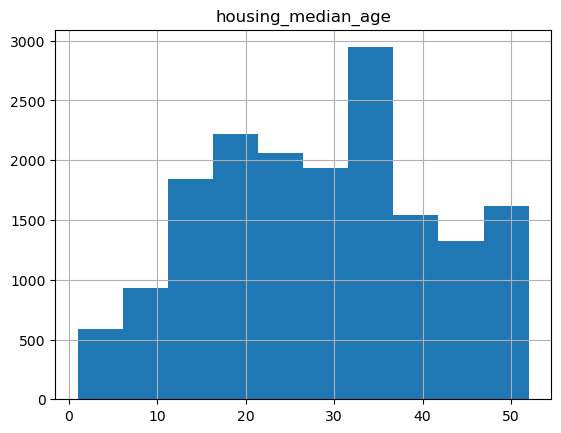

In [ ]:
california_housing_dataframe.hist('housing_median_age')

Another example, `DataFrame.plot.scatter` lets you quickly study the possition of houses:

<Axes: xlabel='longitude', ylabel='latitude'>

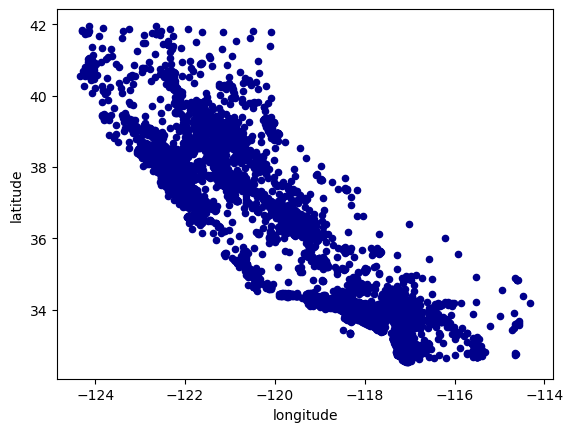

In [ ]:
california_housing_dataframe.plot.scatter(x='longitude',
                      y='latitude',
                      c='DarkBlue')

Boxplots can also be displayed with `DataFrame.boxplot`.

<Axes: >

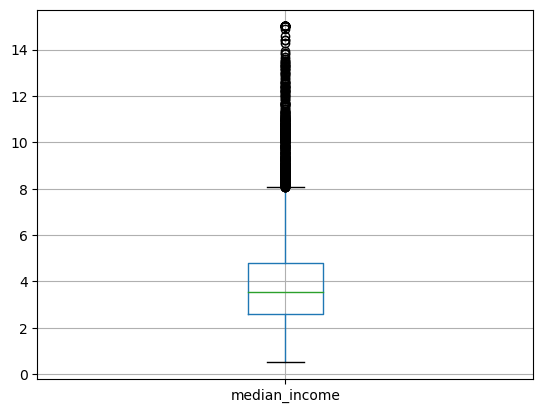

In [ ]:
california_housing_dataframe.boxplot(column=["median_income"])

You can learn other plot options in the plot section of the pandas API [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

## Split-apply-combine on Tidy Data

### Tidy Data

Hadley Wickham wrote a great [article](https://www.jstatsoft.org/article/view/v059i10) in favor of “tidy data.” Tidy data frames follow the rules:

* Each variable is a column.

* Each observation is a row.

* Each type of observation has its own separate data frame.

This is less pretty to visualize as a table (you may notice too many rows with repeated values in certain columns), but the representation of data which is convenient for visualization is different from that which is convenient for analysis. A tidy data frame is almost always much easier to work with than non-tidy formats.

Let's look at the titanic dataset below.

In [ ]:
# load dataset titanic from seaborn package
titanic = sns.load_dataset('titanic')
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

According to the statements above, this dataframe is tidy, so it is easier to process.

### Split-apply-combine

We might be interested in computing a statistic, let's say the survival mean, not for the entire data, but according to subgroups.
Basically, we want to:

* Split the data according to the 'sex' criterion field, i.e., split it up so we have a separate data set for the two classes, you for 'male' and one for 'female'.

* Apply a function (`mean`) to the 'survived' field in these split data sets.

* Combine the results of these averages on the split data set into a new, summary data set that contains the two classes ('male' and 'female') and mean survival rate for each.

The first step is to apply a `groupby` operation.

In [ ]:
grouped = titanic.groupby('sex')
grouped

There is not much to see in the DataFrameGroupBy object that resulted. But there is a lot we can do with this object.
Now, we apply the `mean` function and check the combined result of this operation.

In [ ]:
mean_measurements_per_sex = grouped.mean(numeric_only = True)
mean_measurements_per_sex

survived    pclass        age     sibsp     parch       fare  \
sex                                                                    
female  0.742038  2.159236  27.915709  0.694268  0.649682  44.479818   
male    0.188908  2.389948  30.726645  0.429809  0.235702  25.523893   

        adult_male     alone  
sex                           
female    0.000000  0.401274  
male      0.930676  0.712305

Here the `numeric_only` option is set to disconsider for calculating mean over columns that contain strings like 'embark_town' for example.

The 'sex' field is now the index of our dataframe. We can put it back as a column with the `.reset_index` method.

In [ ]:
mean_measurements_per_sex = mean_measurements_per_sex.reset_index()
mean_measurements_per_sex

sex  survived    pclass        age     sibsp     parch       fare  \
0  female  0.742038  2.159236  27.915709  0.694268  0.649682  44.479818   
1    male  0.188908  2.389948  30.726645  0.429809  0.235702  25.523893   

   adult_male     alone  
0    0.000000  0.401274  
1    0.930676  0.712305

We may choose to display only the 'sex' and 'survived' columns.

In [ ]:
mean_measurements_per_sex[['sex', 'survived']]

sex  survived
0  female  0.742038
1    male  0.188908

Now that you know all the individual steps, here is all the above steps in one shot.

In [ ]:
mean_survival_per_sex = titanic.groupby('sex').mean(numeric_only = True).reset_index()[['sex', 'survived']]
mean_survival_per_sex

sex  survived
0  female  0.742038
1    male  0.188908

## Pivot Tables

This is useful, but we might like to go one step deeper and look at survival rates by both sex and, say, class.
Using the vocabulary of `groupby`, we might proceed using a process like this:
we first *group by* 'class' **and** 'sex', then *select* survival, *apply* a mean aggregate, *combine* the resulting groups, and finally *unstack* the hierarchical index to reveal the hidden multidimensionality. In code:

In [ ]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

This gives us a better idea of how both sex and class affected survival, but the code is starting to look a bit garbled.
While each step of this pipeline makes sense in light of the tools we've previously discussed, the long string of code is not particularly easy to read or use.
This two-dimensional `groupby` is common enough that Pandas includes a convenience routine, `pivot_table`, which succinctly handles this type of multidimensional aggregation.

### Pivot Table Syntax

Here is the equivalent to the preceding operation using the `DataFrame.pivot_table` method:

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

This is eminently more readable than the manual `groupby` approach, and produces the same result.
As you might expect of an early 20th-century transatlantic cruise, the survival gradient favors both higher classes and people recorded as females in the
data. First-class females survived with near certainty (hi, Rose!), while only one in eight or so third-class males survived (sorry, Jack!).

## Pivot Table Widgets

Some of the widgets needs to be specificaly tweaked for Google Colab or Jupyter Notebooks

In [ ]:
from pivottablejs import pivot_ui
from IPython.display import HTML
from IPython.display import IFrame
import json, io

# Google colab alternative template

TEMPLATE = u"""
<!DOCTYPE html>
<html>
    <head>
        <meta charset="UTF-8">
        <title>PivotTable.js</title>

        <!-- external libs from cdnjs -->
        <link rel="stylesheet" type="text/css" href="https://cdnjs.cloudflare.com/ajax/libs/c3/0.4.11/c3.min.css">
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/c3/0.4.11/c3.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jquery/1.11.2/jquery.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.11.4/jquery-ui.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jquery-csv/0.71/jquery.csv-0.71.min.js"></script>


        <link rel="stylesheet" type="text/css" href="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/pivot.min.css">
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/pivot.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/d3_renderers.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/c3_renderers.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/export_renderers.min.js"></script>

        <style>
            body {font-family: Verdana;}
            .node {
              border: solid 1px white;
              font: 10px sans-serif;
              line-height: 12px;
              overflow: hidden;
              position: absolute;
              text-indent: 2px;
            }
            .c3-line, .c3-focused {stroke-width: 3px !important;}
            .c3-bar {stroke: white !important; stroke-width: 1;}
            .c3 text { font-size: 12px; color: grey;}
            .tick line {stroke: white;}
            .c3-axis path {stroke: grey;}
            .c3-circle { opacity: 1 !important; }
            .c3-xgrid-focus {visibility: hidden !important;}
        </style>
    </head>
    <body>
        <script type="text/javascript">
            $(function(){

                $("#output").pivotUI(
                    $.csv.toArrays($("#output").text())
                    , $.extend({
                        renderers: $.extend(
                            $.pivotUtilities.renderers,
                            $.pivotUtilities.c3_renderers,
                            $.pivotUtilities.d3_renderers,
                            $.pivotUtilities.export_renderers
                            ),
                        hiddenAttributes: [""]
                    }
                    , {
                        onRefresh: function(config) {
                            var config_copy = JSON.parse(JSON.stringify(config));
                            //delete some values which are functions
                            delete config_copy["aggregators"];
                            delete config_copy["renderers"];
                            //delete some bulky default values
                            delete config_copy["rendererOptions"];
                            delete config_copy["localeStrings"];
                            $("#output2").text(JSON.stringify(config_copy, undefined, 2));
                        }
                    }
                    , %(kwargs)s
                    , %(json_kwargs)s)
                ).show();
             });
        </script>
        <div id="output" style="display: none;">%(csv)s</div>

        <textarea id="output2"
        style="float: left; width: 0px; height: 0px; margin: 0px; opacity:0;" readonly>
        </textarea>

        <button onclick="copyTextFunction()">Copy settings</button>
        <script>
        function copyTextFunction() {
                    var copyText = document.getElementById("output2");
                    copyText.select();
                    document.execCommand("copy");
                    }
        </script>

    </body>
</html>
"""


def pivot_cht_html(df, outfile_path = "pivottablejs.html", url="",
    width="100%", height="500",json_kwargs='',  **kwargs):
  with io.open(outfile_path, 'wt', encoding='utf8') as outfile:
      csv = df.to_csv(encoding='utf8')
      if hasattr(csv, 'decode'):
          csv = csv.decode('utf8')
      outfile.write(TEMPLATE %
            dict(csv=csv, kwargs=json.dumps(kwargs),json_kwargs=json_kwargs))

  IFrame(src=url or outfile_path, width=width, height=height)
  return HTML(outfile_path)

Calling the function 'pivot_ui' with Pandas DataFrame as input will allow you interactively explore and plot its values

In [ ]:
pivot_ui(titanic)
HTML('pivottablejs.html')

**Watermark**

In [ ]:
from watermark import watermark
watermark(iversions=True, globals_=globals())
print(watermark())
print(watermark(packages="watermark,numpy,pandas,seaborn,pivottablejs"))

Last updated: 2023-08-25T10:51:16.460182+02:00

Python implementation: CPython
Python version       : 3.9.17
IPython version      : 8.14.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 16
Architecture: 64bit

watermark   : 2.4.3
numpy       : 1.23.5
pandas      : 2.0.3
seaborn     : 0.12.2
pivottablejs: 0.9.0

